In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.autograd import Variable

In [2]:
import numpy
import matplotlib.pyplot as plt

%matplotlib inline
torch.manual_seed(4)

### Creating Dataset :

Creating dataset for regression by creating input (x) and output (y) tensors. The input tensor, x, contains values evenly distributed between -1 and 1. The output tensor, y, is created by squaring the x values and adding a small amount of random noise.

In [3]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)

In [4]:
x

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

In [5]:
y = x.pow(2) + 0.2 * torch.rand(x.size())

In [6]:
y

tensor([[1.1119],
        [1.0718],
        [0.9391],
        [0.9245],
        [0.8464],
        [0.8160],
        [0.9708],
        [0.9198],
        [0.8266],
        [0.8643],
        [0.7006],
        [0.6479],
        [0.7592],
        [0.6384],
        [0.6333],
        [0.6449],
        [0.6107],
        [0.4738],
        [0.4663],
        [0.3874],
        [0.4596],
        [0.3956],
        [0.4301],
        [0.3913],
        [0.4506],
        [0.3536],
        [0.3755],
        [0.3382],
        [0.3774],
        [0.2299],
        [0.3387],
        [0.3114],
        [0.1851],
        [0.2724],
        [0.2905],
        [0.1293],
        [0.1354],
        [0.2322],
        [0.2346],
        [0.1714],
        [0.1675],
        [0.2036],
        [0.2106],
        [0.0540],
        [0.0712],
        [0.1925],
        [0.1590],
        [0.0556],
        [0.0670],
        [0.1971],
        [0.0375],
        [0.1652],
        [0.1606],
        [0.0091],
        [0.0084],
        [0

In [7]:
x.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

convering tensors imtp variables.

In [8]:
x = Variable(x)

In [9]:
x

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

In [10]:
y = Variable(y)

In [11]:
y

tensor([[1.1119],
        [1.0718],
        [0.9391],
        [0.9245],
        [0.8464],
        [0.8160],
        [0.9708],
        [0.9198],
        [0.8266],
        [0.8643],
        [0.7006],
        [0.6479],
        [0.7592],
        [0.6384],
        [0.6333],
        [0.6449],
        [0.6107],
        [0.4738],
        [0.4663],
        [0.3874],
        [0.4596],
        [0.3956],
        [0.4301],
        [0.3913],
        [0.4506],
        [0.3536],
        [0.3755],
        [0.3382],
        [0.3774],
        [0.2299],
        [0.3387],
        [0.3114],
        [0.1851],
        [0.2724],
        [0.2905],
        [0.1293],
        [0.1354],
        [0.2322],
        [0.2346],
        [0.1714],
        [0.1675],
        [0.2036],
        [0.2106],
        [0.0540],
        [0.0712],
        [0.1925],
        [0.1590],
        [0.0556],
        [0.0670],
        [0.1971],
        [0.0375],
        [0.1652],
        [0.1606],
        [0.0091],
        [0.0084],
        [0

plotting the graph from the generated dataframe.

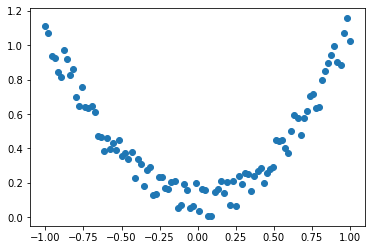

In [12]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

### Creating Non Linear Model :

Creating  a non-linear model which has an input layer, a hidden layer with 20 units activated by ReLU, and an output layer.

In [13]:
hidden = nn.Linear(1, 20, bias=True)

activation = nn.ReLU()

optput = nn.Linear(20, 1, bias=True)

net = nn.Sequential(hidden, activation, optput)

### Loss Function :

Initializing an Adam optimizer for training a neural network with a learning rate of 0.1 with a mean squared error (MSE) loss function (loss_func) for evaluating the difference between predictions and target values which are crucial for training and optimizing neural networks.

In [15]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()

### Training Model :

Training a neural network model for 200 iterations. In each iteration, it predicts outputs, computes the loss, performs backpropagation, and updates model parameters. Every 10 iterations, it visualizes the data points and predictions, displaying the loss value which allows monitoring of the training progress. After training, interactive mode is turned off.

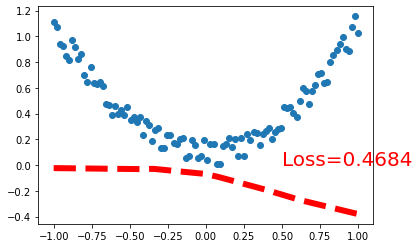

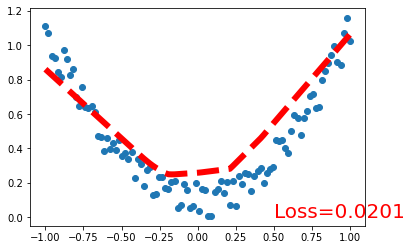

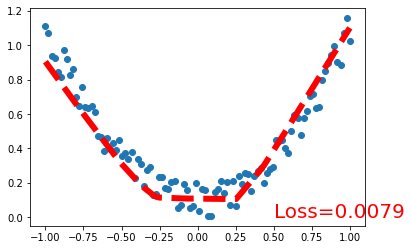

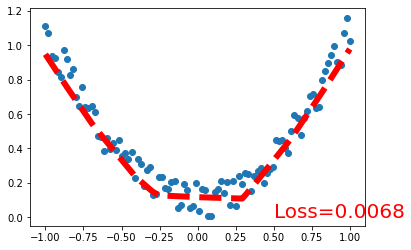

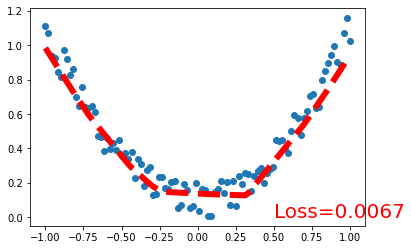

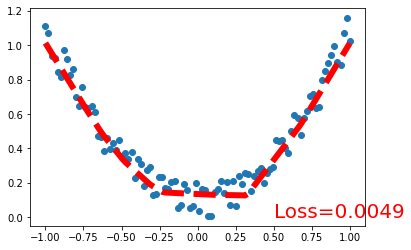

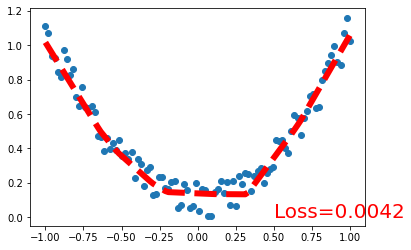

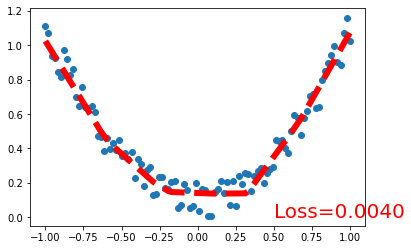

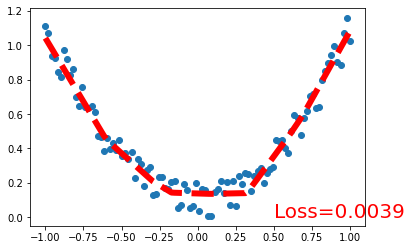

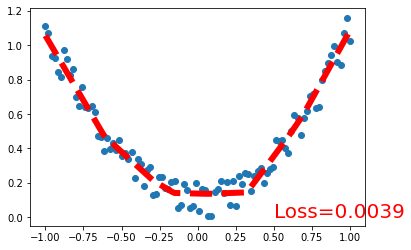

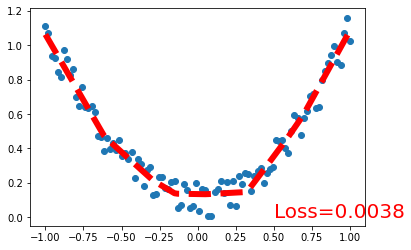

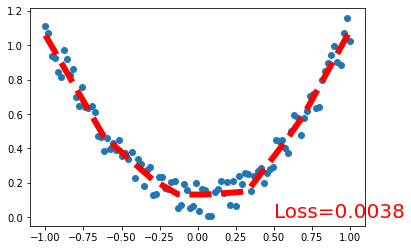

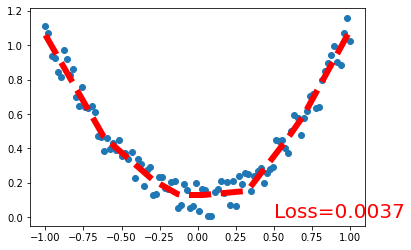

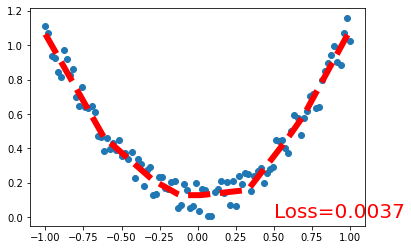

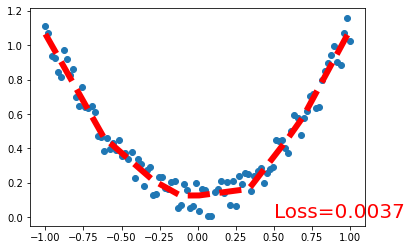

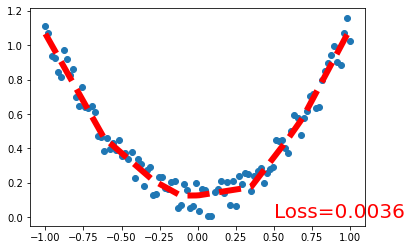

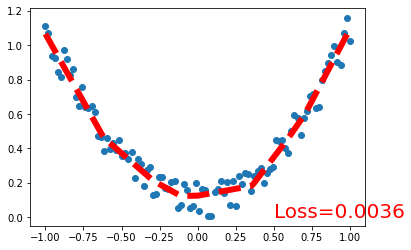

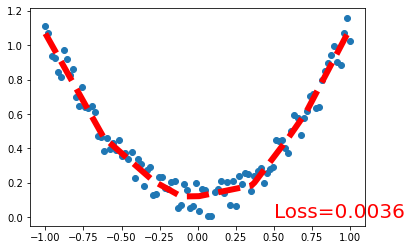

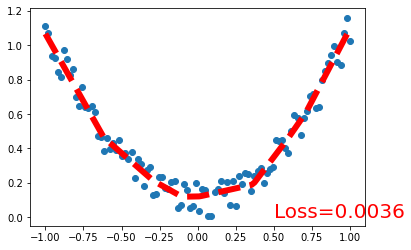

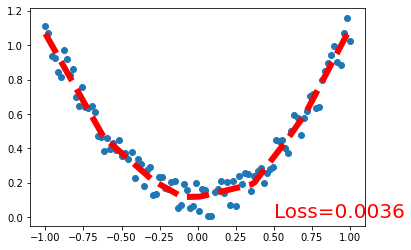

In [16]:
for t in range(200):
    prediction = net(x)
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 10  == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r--', lw=6)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data, fontdict={'size':20, 'color':'red'})
        plt.show()
        plt.pause(0.2)
        
plt.ioff()